In [26]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal, f
import statsmodels.api as sm
from statsmodels.formula.api import ols

/Users/praveenkumar/miniconda3/envs/main_py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
DATA_DIR = "../Datasets/"

#### Background: Critical Flicker Frequency (CFF), and Eye Color
There is various flickering light in our environment; for instance, light from computer screens and fluorescent bulbs. If the frequency of the flicker is below a certain threshold, the flicker can be detected by the eye. Different people have slightly different flicker "threshold" frequencies (known as the critical flicker frequency, or CFF). Knowing the critical threshold frequency below which flicker is detected can be important for product manufacturing as well as tests for ocular disease. Do people with different eye color have different threshold flicker sensitivity? A 1973 study This link opens in a new tab ("The Effect of Iris Color on Critical Flicker Frequency," Journal of General Psychology [1973], 91–95) obtained the following data from a random sample of 19 subjects.

In [3]:
data = pd.read_excel(os.path.join(DATA_DIR, "flicker.xls"))

In [5]:
data.head()

,Color,CFF,Blue,Brown,Green
0,Brown,26.8,25.7,26.8,26.4
1,Brown,27.9,27.2,27.9,24.2
2,Brown,23.7,29.9,23.7,28.0
3,Brown,25.0,28.5,25.0,26.9
4,Brown,26.3,29.4,26.3,29.1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
Color    19 non-null object
CFF      19 non-null float64
Blue     6 non-null float64
Brown    8 non-null float64
Green    5 non-null float64
dtypes: float64(4), object(1)
memory usage: 840.0+ bytes


In [7]:
data.describe()

,CFF,Blue,Brown,Green
count,19.000000,6.000000,8.000000,5.000000
mean,26.752632,28.166667,25.587500,26.920000
std,1.845526,1.527962,1.365323,1.843095
min,23.700000,25.700000,23.700000,24.200000
25%,25.350000,27.475000,24.725000,26.400000
50%,26.800000,28.400000,25.350000,26.900000
75%,28.150000,29.175000,26.425000,28.000000
max,29.900000,29.900000,27.900000,29.100000


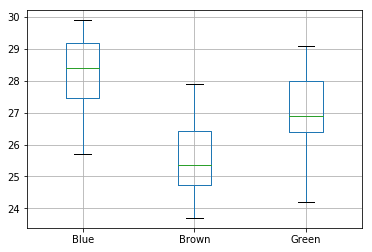

In [25]:
data[["Blue", "Brown", "Green"]].boxplot()

#### Are the conditions satisfied ?

In [10]:
print("Condition 1 : Since the sample is random, so there is no dependency.")
print("Condition 2 : Most of the values lies within the middle 50 %, so there is not extreme skewness for each population, and there are no extreme outliers.")
print("Condition 3 : Ratio of largest standard deviation to the smallest is 1.843095 / 1.365323 = {} which is less than 2".format(1.843095 / 1.365323))
print("So all the conditions that allow us to safely use the ANOVA F-test are met.")

Condition 1 : Since the sample is random, so there is no dependency.
Condition 2 : Most of the values lies within the middle 50 %, so there is not extreme skewness for each population, and there are no extreme outliers.
Condition 3 : Ratio of largest standard deviation to the smallest is 1.843095 / 1.365323 = 1.349933312483566 which is less than 2
So all the conditions that allow us to safely use the ANOVA F-test are met.


#### Carry out the ANOVA F-test and state the test statistic and p-value. Interpret the p-value and draw your conclusion in context.

#### Scipy notes : 
The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

The samples are independent.

Each sample is from a normally distributed population.

The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

If these assumptions are not true for a given set of data, it may still be possible to use the Kruskal-Wallis H-test (scipy.stats.kruskal) although with some loss of power.

In [61]:
sample_brown = data.loc[data["Brown"].isnull()==False, "Brown"].values
sample_green = data.loc[data["Green"].isnull()==False, "Green"].values
sample_blue = data.loc[data["Blue"].isnull()==False, "Blue"].values

In [62]:
f_oneway(sample_brown, sample_green, sample_blue)

F_onewayResult(statistic=4.802346136941867, pvalue=0.023248951722088834)

In [63]:
kruskal(sample_brown, sample_green, sample_blue)

KruskalResult(statistic=7.194402985074635, pvalue=0.027400295183181784)

In [30]:
# get ANOVA table as R like output
# reshape the d dataframe suitable for statsmodels package

In [29]:
d_melt = pd.melt(data[["Brown", "Green", "Blue"]].reset_index(), id_vars=['index'], value_vars=['Brown', 'Green', 'Blue'])

In [34]:
d_melt.columns = ['index', 'color', 'value']

In [37]:
d_melt = d_melt.dropna().reset_index(drop=True)

In [39]:
d_melt.head()

,index,color,value
0,0,Brown,26.8
1,1,Brown,27.9
2,2,Brown,23.7
3,3,Brown,25.0
4,4,Brown,26.3


In [40]:
model = ols('value ~ C(color)', data=d_melt).fit()

In [41]:
anova_table = sm.stats.anova_lm(model, typ=2)

In [42]:
anova_table

,sum_sq,df,F,PR(>F)
C(color),22.997285,2.0,4.802346,0.023249
Residual,38.310083,16.0,NaN,NaN
